# Car Price Prediction

In [1]:
# python version: python3
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [2]:
# Data Preperation
train = pd.read_csv("C:\\Users\\Zver\\Downloads\\training.csv")
test = pd.read_csv("C:\\Users\\Zver\\Downloads\\test.csv")

### Part a - Split Data to x and y

In [3]:
# Split the data, train_y is a dataset target
train_x_a = train [0:166]
train_x_a = train.drop(columns='price')
train_y = train[['price']]

In [4]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [5]:
train_y.head(2)

,price
0,15985.0
1,7349.0


### Part b - Handling Missing Values

In [6]:
# Handling Missing Values:
# Columns that have null values
nan_columns = train.columns[train.isnull().any()].tolist()
print(nan_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [7]:
# Create dataset
train_x_b = pd.DataFrame.copy(train_x_a)

# Fill missing values of nan_columns with the average of nan_columns (median)
train_x_b = train_x_a.fillna(train_x_a.median() )

In [8]:
# Identify in which rows 'price' has null values 
null_prices=train_y[train_y['price'].isnull()].index.tolist()
null_prices

[18, 37, 47, 69, 71, 81, 82, 100, 107]

In [9]:
# Drop rows that 'price' has null values 
train_y=train_y.drop(null_prices)
train_x_b=train_x_b.drop(null_prices)
train_x_b.isnull().any()

fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
dtype: bool

### Part c - Handling Categorical Values

In [10]:
# Columns that contains categorical values
categorical_columns = list(train_x_b.select_dtypes(include=['object']))
print(categorical_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### Part d - One Hot Encoding

In [11]:
# Encode the categorical values
train_x_d = pd.get_dummies(train_x_b)
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,104.3,188.8,67.2,56.2,2410.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,0,0,1,0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,0,1,0,0,0,0,0


### Part e - Standard Scaling

In [12]:
# Scale our dataframe with standardization
scaler = StandardScaler()
train_x_e = scaler.fit_transform(train_x_d)
train_x_e = pd.DataFrame.from_records(train_x_e)
train_x_e.columns = train_x_d.columns

In [13]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,-0.080582,-0.080582,-0.114332,-0.248282,1.387274,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


## Data Exploration

### Part f - Visualize variable distributions:

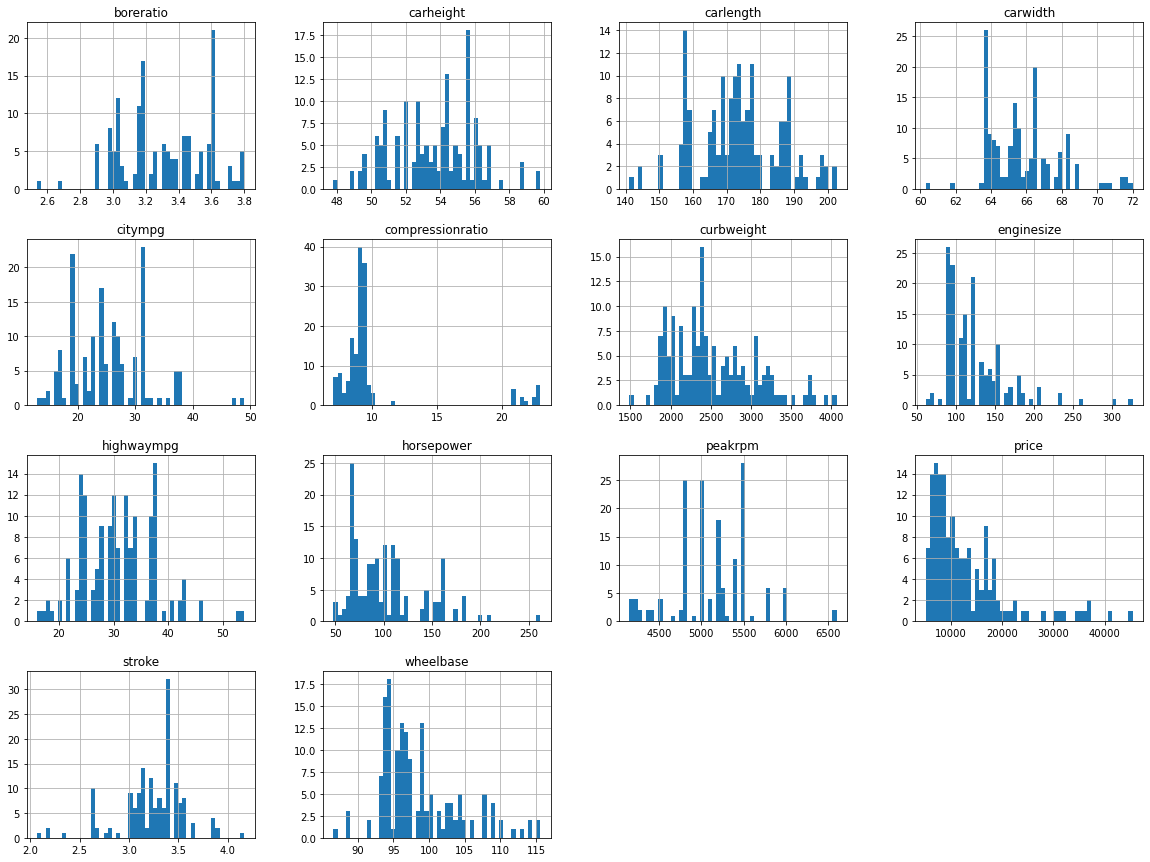

In [14]:
# Plot the histogram of each of the variables in the dataset, may be there any extreme points in these distributions
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

### Part g - Correlation

In [15]:
# Strongest 5 correlation values between 'price' and other variables 
# The first, the strongest one is a 'price', so we started from 1, not 0
top_5_corr = train.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:6] 
print(top_5_corr)

enginesize    0.873498
curbweight    0.843303
carwidth      0.812180
horsepower    0.801589
carlength     0.710782
Name: price, dtype: float64


### Part h - Scatter Plot

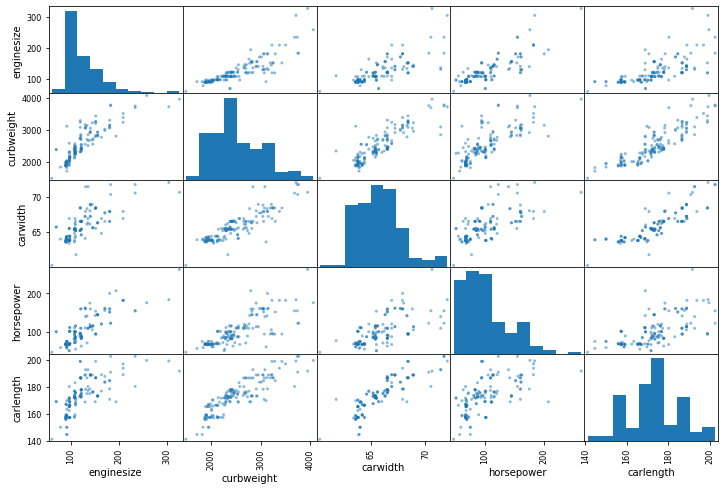

In [16]:
# Scatter plot of the top 5 correlations
from pandas.plotting import scatter_matrix
top_5_list = ['enginesize', 'curbweight', 'carwidth', 'horsepower', 'carlength']
scatter_top5x5 = scatter_matrix(train[top_5_list], figsize = (12,8))

## LINEAR REGRESSION TO PREDICT CAR PRICES

### Part i - Create a Model

In [17]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(train_x_e, train_y)

LinearRegression()

In [18]:
# Predict on training data and calculate train MSE
from sklearn.metrics import mean_squared_error
price_predictions = lr_model.predict(train_x_e)
lr_mse = mean_squared_error(train_y, price_predictions)
lr_mse 

4292176.310954016

### Part j - Validate the Model

In [19]:
# 5-fold cross validation & mse for each fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
train_mse_score = abs(cross_val_score(lr_model, train_x_e, train_y, cv=5, scoring = 'neg_mean_squared_error'))
print(train_mse_score)

[1.00747010e+07 3.24934271e+33 8.00690789e+06 1.14919549e+07
 3.20845158e+32]


In [20]:
average_mse = sum(train_mse_score)/len(train_mse_score)
print(average_mse)

7.140375732491069e+32


### Part k - Test Model

In [21]:
# Data Preperation for test dataset
test_x = test[0:43]
test_x = test_x.drop(columns='price')
test_y = test[['price']]

In [22]:
test_x.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,...,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
1,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,...,four,110.0,1bbl,3.15,3.58,9.0,86.0,NaN,27.0,33.0


In [23]:
test_y.head(2)

,price
0,18920.0
1,10295.0


In [24]:
# Columns that have nan values
nan_columns=test_x.columns[test_x.isnull().any()].tolist()
print(nan_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [25]:
# Create dataset
test_x_b = pd.DataFrame.copy(test_x)

# Fill missing values of nan_columns with the average of nan_columns (median)
test_x_b = test_x.fillna( train_x_a.median() )

In [26]:
# Identify in which rows 'price' has null values
null_prices_test=test_y[test_y['price'].isnull()].index.tolist()
null_prices_test

[10]

In [27]:
# Drop rows that 'price' has null values 
test_y=test_y.drop(null_prices_test)
test_x_b=test_x_b.drop(null_prices_test)

In [28]:
# Columns that contains categorical values
categorical_columns = test_x.select_dtypes(include=['object'])
test_x_c = pd.Categorical(categorical_columns)
print(test_x_c)

[fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem]
Categories (9, object): [aspiration, carbody, cylindernumber, doornumber, ..., enginelocation, enginetype, fuelsystem, fueltype]


In [29]:
# Encode the categorical values
test_x_d=pd.get_dummies(test_x_b)
test_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,...,0,0,0,0,0,0,0,0,1,0
1,96.5,175.4,62.5,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
# Scale our dataframe with standardization
scaler = StandardScaler()
test_x_e = scaler.fit_transform(test_x_d)
test_x_e = pd.DataFrame.from_records(test_x_e)
test_x_e.columns = test_x_d.columns
test_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,0.944910,1.330392,2.077580,0.575907,0.467610,-0.031064,-0.712848,0.347447,-0.496982,0.051041,...,-0.229416,-0.229416,-0.229416,-0.229416,-0.460566,-0.160128,-0.377964,-0.229416,0.951190,-0.229416
1,-0.496873,-0.092751,-1.498047,-0.082272,-0.648555,-0.569510,-0.859073,0.987246,-0.378371,-0.475832,...,-0.229416,-0.229416,-0.229416,4.358899,-0.460566,-0.160128,-0.377964,-0.229416,-1.051315,-0.229416


### Part l - Predict on Test Set

In [31]:
# Training of the model
predicted_values = lr_model.predict(test_x_e)

In [32]:
print(predicted_values[10:13])

[[19090.18052757]
 [ 9693.34765065]
 [ 6030.86795483]]


In [33]:
test_mse_score = mean_squared_error(test_y, predicted_values)
print(test_mse_score)

17255936.444911793


### Part m

In [34]:
# Polynomial Futures
import numpy.random as rnd
from sklearn.preprocessing import PolynomialFeatures
poly_transf = PolynomialFeatures(degree=2, include_bias=False)
train_x_m  = poly_transf.fit_transform(train_x_e)
train_x_m = pd.DataFrame.from_records(train_x_m)

In [35]:
train_x_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273
0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,0.099291,0.025392,-0.361126,0.078235,0.006494,-0.092351,0.020007,1.313433,-0.284544,0.061644
1,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,0.099291,0.025392,0.274948,0.078235,0.006494,0.070313,0.020007,0.761364,0.216641,0.061644


In [36]:
lr_model_poly = LinearRegression()
train_mse_score = abs(cross_val_score(lr_model_poly, train_x_m, train_y, cv=5, scoring = 'neg_mean_squared_error'))
average_mse = sum(train_mse_score)/len(train_mse_score)
print(average_mse)

9.412285244987408e+30


### part n

In [37]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Lasso Regularization
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

In [39]:
train_mse_score = abs(cross_val_score(lasso, train_x_m, train_y, cv=5, scoring = 'neg_mean_squared_error'))
average_mse = sum(train_mse_score)/len(train_mse_score)
print(average_mse)

1084950473.1152205


### part o

In [40]:
# Regularization Curve
all_scores = {}
all_scores_means= {}
for a in range(1,3000,10): # Go through all alphas from 1 to 3000
    lasso = Lasso(alpha = a) #Create new Lasso model
    lasso.fit(train_x_m, train_y) 
    lasso.predict(train_x_m)
    lasso_mse_score = abs(cross_val_score(lasso, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5))    
    all_scores[a] = lasso_mse_score
    all_scores_means[a] = abs(lasso_mse_score.mean())
    
min_alpha = min(all_scores_means, key=all_scores_means.get) #Get minimum score
min_error = all_scores_means.get(min_alpha) #Get minimum index which represents the alpha

Text(0, 0.5, 'Average MSE')

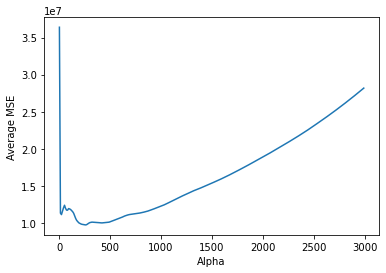

In [41]:
all_list = list(all_scores.values())
alpha_list = list(all_scores.keys())
avr_cv_scores = np.mean(all_list, axis = 1)
np.where(avr_cv_scores == avr_cv_scores.min())
plt.plot(alpha_list, avr_cv_scores)
plt.xlabel('Alpha')
plt.ylabel('Average MSE')

In [42]:
print(f"Minimum error was {round(min_error, 2)} at alpha {min_alpha}")

Minimum error was 9705819.82 at alpha 261


### part p

In [43]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [ {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
               {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0, 3000.0],
                'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
             ]

# Support Vector Machine
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(train_x_e, train_y)

best_mse = np.mean(-grid_search.best_score_)
print('The Best MSE Score:', best_mse)
best_parameters = grid_search.best_params_
print('The Best Hyperparameters:',best_parameters)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    5.4s finished


The Best MSE Score: 9839464.386320233
The Best Hyperparameters: {'C': 3000.0, 'kernel': 'linear'}
